<a href="https://colab.research.google.com/github/ahbri/Les-tps-AI/blob/main/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regression multiple**



In [ ]:
# charger un ensemble de données à partir d'un fichier CSV nommé 'data.csv' dans un DataFrame pandas en utilisant pd.read_csv()
# et afficher les cinq premières lignes avec la fonction head()
import numpy as np
import pandas as pd
cars_dataset=pd.read_csv('data.csv')
cars_dataset.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [ ]:
#on a extrait deux colonnes spécifiques du DataFrame cars_dataset, à savoir 'Volume' et 'Weight', pour former une nouvelle variable X.
# Cette nouvelle variable X contient les données des colonnes 'Volume' et 'Weight' du DataFrame cars_dataset pour qu'on peut l'utiliser comme entrée

X=cars_dataset[['Volume','Weight']]

In [ ]:
#on extrait la colonne 'CO2' de notre DataFrame cars_dataset et la stocker dans une variable Y contient les données de la colonne 'CO2'
#de notre ensemble de données, prêtes à être utilisées comme variable cible

Y=cars_dataset['CO2']

In [ ]:
#regr = linear_model.LinearRegression(): Cette fonction crée une instance de la classe LinearRegression du module linear_model.
# Cette classe représente un modèle de régression linéaire.
#regr.fit(X, Y): Cette ligne ajuste le modèle de régression linéaire aux données d'entraînement.

from sklearn import linear_model
regr = linear_model.LinearRegression()



In [ ]:
#La méthode fit() prend deux arguments : X, qui sont les caractéristiques d'entrée, et Y, qui sont les valeurs cibles correspondantes.
#Le modèle apprend à partir de ces données d'entraînement et ajuste les paramètres pour minimiser l'erreur entre les valeurs prédites et les valeurs réelles.

regr.fit(X, Y)

LinearRegression()

In [ ]:
#La fonction predict utilisera le modèle entraîné pour prédire la valeur de 'CO2' pour une voiture ayant un volume de 2300 et un poids de 1300.
predictedCO2 = regr.predict([[2300, 1300]])
print(predictedCO2)

[107.46304306]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#La méthode coef_ de l'objet de régression linéaire renvoie les coefficients de pente de chaque caractéristique dans le modèle.
print(regr.coef_[0])   #coef de Volume
(regr.coef_[1])        #coef de weight

0.007805257527747128


0.007550947270300682

# **Regression Polynomiale**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures


In [167]:


# Génération des données de regression en important la fonction datasets.make_regression
X,y = make_regression(n_samples=100, n_features=1, random_state= 42, noise=5)

# Transformer X en une fonction quadratique de X
y=y** 2

poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X= poly_feat.fit_transform(X)
X

array([[ 9.31280119e-01,  8.67282660e-01],
       [ 8.70470682e-02,  7.57719209e-03],
       [-1.05771093e+00,  1.11875241e+00],
       [ 3.14247333e-01,  9.87513860e-02],
       [-4.79174238e-01,  2.29607950e-01],
       [ 6.47688538e-01,  4.19500442e-01],
       [-4.63417693e-01,  2.14755958e-01],
       [ 5.42560044e-01,  2.94371401e-01],
       [ 6.11676289e-01,  3.74147882e-01],
       [ 1.00353290e+00,  1.00707828e+00],
       [ 8.21902504e-01,  6.75523727e-01],
       [ 1.53803657e+00,  2.36555648e+00],
       [ 7.38466580e-01,  5.45332890e-01],
       [-2.19671888e-01,  4.82557383e-02],
       [-8.08493603e-01,  6.53661906e-01],
       [ 9.17607765e-02,  8.42004011e-03],
       [-1.95967012e+00,  3.84030699e+00],
       [ 5.13267433e-01,  2.63443458e-01],
       [ 1.03099952e+00,  1.06296002e+00],
       [-2.61974510e+00,  6.86306441e+00],
       [ 4.96714153e-01,  2.46724950e-01],
       [ 9.70775493e-02,  9.42405059e-03],
       [-4.65729754e-01,  2.16904203e-01],
       [ 9.

(100, 2)

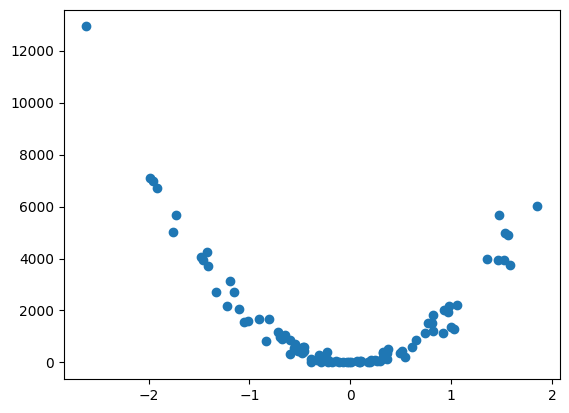

In [168]:
#plt.scatter(X, y, color='orange', label='Données')

# Ajouter des labels et un titre
#plt.xlabel('X')
#plt.ylabel('y')
#plt.title('Visualisation des données de regression')
#plt.legend()

# Afficher le graphique
#plt.show()
plt.scatter(X[:,0],y)
X.shape


In [169]:
from sklearn.linear_model import SGDRegressor
# Définir le modèle avec SGDRegressor
model = SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.0001)

In [170]:

# Entraîner le modèle sur les données
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=100)

In [171]:
precision = model.score(X, y)

# Afficher la précision
#model.score(X, y) Elle prend en argument les caractéristiques (X) et les étiquettes cibles (y) du jeu de données et retourne le coefficient de détermination
#qui mesure à quel point les valeurs prédites du modèle correspondent aux valeurs réelles du jeu de données.
# Une valeur proche de 1 indique un bon ajustement du modèle aux données, tandis qu'une valeur proche de 0 indique un ajustement médiocre.
print("Précision du modèle :", precision)


Précision du modèle : 0.9322694234718804


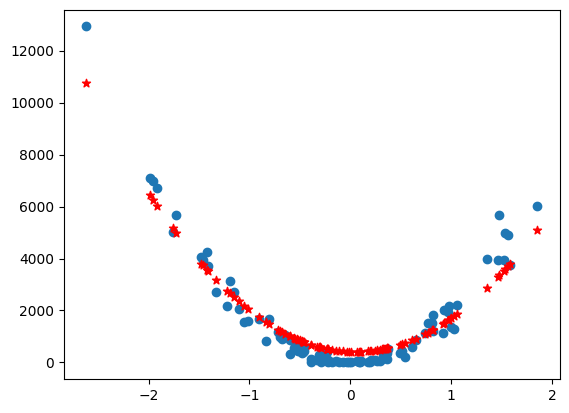

In [176]:
# Tracé d'un nuage de points pour visualiser la relation entre la première caractéristique (x[:, 0]) et la variable cible (y)
plt.scatter(X[:,0],y,marker='o')
# Tracé des prédictions du modèle de régression en rouge
plt.scatter(X[:,0], model.predict(X), c='red' , marker ='*')




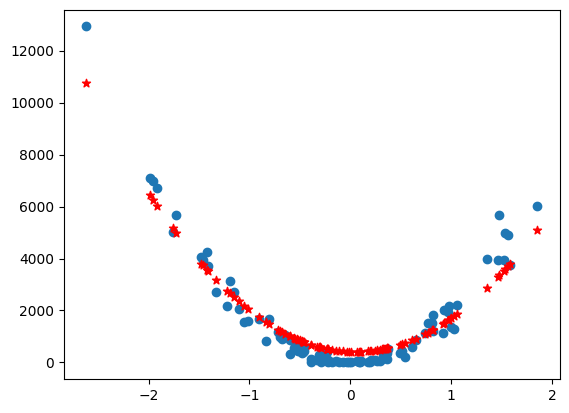

In [182]:
# Créer une nouvelle instance du modèle avec 1000 itérations et un learning rate de 0.001
model_1000 = SGDRegressor(max_iter=10000, learning_rate='constant', eta0=0.001)

# Entraîner le modèle sur les données
model_1000.fit(X, y)

# Faire de nouvelles prédictions avec le nouveau modèle
predictions_1000 = model_1000.predict(X)

# Tracer les résultats
plt.scatter(X[:,0],y,marker='o')
plt.scatter(X[:,0], model.predict(X), c='red' , marker ='*')